# Newton Raphson solver in pure Python, plus some other introductory notes

First we need to import a few libraries that we will need. 

The first line is specific to using Python in the Jupyter environment. It defines how and where to put plots. 

The second two lines load the packages we will wish to use. They are comparable to Matlab toolboxes. In computational usage of Python, you almost **always** use these two, perhaps additional libraries as well. 

The last of the 4 lines is loading my code simply so we have a starting point. 

In [68]:
# This is not a comment. This isn't Matlab. 
%matplotlib inline  
"""Comment the previous line and uncomment the following one to 
have a GUI for your plot. Note that you will restart the kernel 
for this to work.""" 
# %matplotlib qt5 
import matplotlib.pyplot as plt
import scipy as sp

The following line imports (loads) some functions from the file
``newton_raphson.py``. It should be easy to understand which ones. 
Loading them one at a time make sense when there is one or two.
When their are more, you can use
``import newton_raphson as nr`` and *all* functions will be loaded
with names in the ``nr`` name subspace. That is, you would call the function ``newton_raphson`` as ``np.newton_raphson``. This keeps your name space from clashing and getting swamped with potentially conflicting names. 

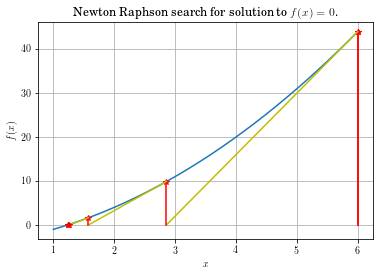

In [2]:
# See ``newton_raphson.py`` for the content of these functions. 
from newton_raphson import newton_raphson_plot
from newton_raphson import myfunc
function_name = 'myfunc'
newton_raphson_plot(function_name,6)
plt.savefig('Newton_Raphson_Solution.svg')  # There is now a file in Scaled Vector Format

If you really want to understand the Jupyter *magics* uncomment the next line. (remove the '#')

In [3]:
%magic

(1.2360679774997896, -7.81975583743945e-11)

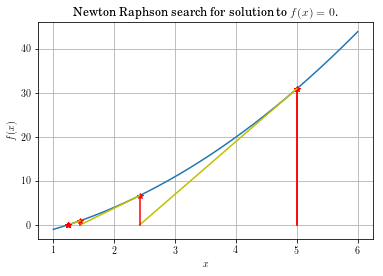

In [4]:
# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!
newton_raphson_plot(function_name, x0=5)

(1.2360679775000651, -9.171621755329502e-07)

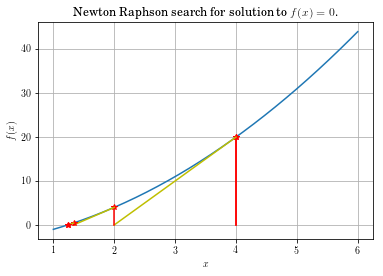

In [5]:
newton_raphson_plot(function_name, x0=4)
## For higher quality inline plots, uncomment below. 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

So, how is this done? Let's start by defining a *function*, or *subroutine*, etc.

In [6]:
def myfunc(x):
#    print('I love Python')
    return x**2+2*x-4

In [7]:
myfunc(3)

11

In [8]:
a = myfunc(4)
print(a)

20


The word *def* takes the place of *function* in Matlab. The colon, ":", ends the line. All other lines are indented a single level. [Standard](https://www.python.org/dev/peps/pep-0008/) formating defined this as 4 spaces. 

* Most editors will move to four spaces is you use the *Tab* key. 
* [Standard](https://www.python.org/dev/peps/pep-0008/) for formatting are considered a big deal. 
    * You won't remember them.
    * A good editor (Spyder, PyCharm, Atom) will remember them.
    * They substantially enhance readability.
    * Many editors will make this happen for you automatically on save. 

In [9]:
function_name = 'myfunc'

Plots are done similarly to Matlab. 
* We optioned here, for our sanity, to control the *name space*
* The name *ylabel* **can still be used as a variable**!

In [10]:
ylabel = 4
ylabel

4

In [11]:
help(sp.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

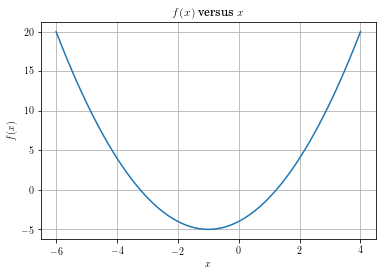

In [12]:
%matplotlib inline
x = sp.linspace(start = -6, stop= 4, num = 200)
#x = sp.linspace(start=-6, stop=10,num=200)
plt.plot(x,myfunc(x))

plt.grid('on')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('$f(x)$ versus $x$')
plt.show()
# To save a plot
plt.savefig('myplot.pdf')

In [13]:
def newton_raphson(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1 # I can add 1 to the variable *count*. Neat Python shortcut. 
        # This is a comment
        # The next line is "Matlab style" and *bad*
        #f = eval(function + '('+ str(x) + ')')
        f = globals()[function](x)  #We explain later. 
        #f2 = eval(function + '('+ str(x+dx) + ')')
        f2 = globals()[function](x+dx)
        # Calculate the slope (estimation of derivative. )
        dfdx = (f2-f)/dx
        # Straight line approximation of delta x to intercept y=0. 
        deltax = -f/dfdx
        # New estimate of x. 
        x = x + deltax
    return x, deltax, count                

In [14]:
newton_raphson(function_name, x0=2)

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [15]:
(x_soln, final_delta_x, num_steps) = newton_raphson(function_name, x0=2)

In [16]:
print(x_soln)
print(final_delta_x)
print(num_steps)

1.2360679774997898
-2.7585905568420595e-13
5


Outputs and unpacking of results

In [17]:
a = newton_raphson(function_name, x0=2)
a

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [18]:
a[0]

1.2360679774997898

In [19]:
a1,a2,a3=a
a1

1.2360679774997898

In [20]:
%%timeit #just clocking this
newton_raphson(function_name, x0=2)

7.46 µs ± 722 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
# less efficient- using the eval statement
def newton_raphson_eval(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    while abs(deltax) > eps and count < 50:
        count += 1
        f = eval(function + '('+ str(x) + ')')
        #f = globals()[function](x)
        f2 = eval(function + '('+ str(x+dx) + ')')
        #f2 = globals()[function](x+dx)
        dfdx = (f2-f)/dx
        deltax = -f/dfdx
        x = x + deltax
    return x, deltax

In [22]:
%%timeit
newton_raphson_eval(function_name, x0=2)

210 µs ± 44.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


One of the neat things about Python, though is that a function itself can be assigned to a variable. When we to that, the variable acts just like the function. In the following the  polynomial function ``myfunc`` defined above is assigned to the variable ``function`` to perform the search. It runs faster yet. 

In [23]:
def newton_raphson_variable(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1  
        f = function(x)  # Note that function is a variable containing the actual function
        # It acts like the function itself. 
        f2 = function(x+dx)
        dfdx = (f2-f)/dx # Calculate the slope (estimation of derivative. )
        deltax = -f/dfdx # Straight line approximation of delta x to intercept y=0. 
        x = x + deltax # New estimate of x.
    return x, deltax, count 

In [24]:
%%timeit
newton_raphson_variable(myfunc, x0=2)

6.12 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
import scipy.optimize

In [26]:
%%timeit
scipy.optimize.broyden1(globals()[function_name], 2, f_tol=1e-14)

3.81 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit
scipy.optimize.broyden2(globals()[function_name], 2, f_tol=1e-14)

2.27 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
scipy.optimize.root(globals()[function_name], 2)

101 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit
scipy.optimize.fsolve(globals()[function_name], 2)

102 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


My code is faster. How? Well, the other codes are optimized for very large problems. Mine is optimized for small problems. 

[Formatted printing](https://mkaz.tech/code/python-string-format.html) can be performed using the *.format* operator. 

In [30]:
print(sp.pi)
print('{:.2f}'.format(sp.pi))
print('{:.4f}'.format(sp.pi))
print('{:^12.2f}'.format(sp.pi))

3.141592653589793
3.14
3.1416
    3.14    


In [66]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [67]:
def sdof_resp(x0=1, v0=0.1, m=1, c=.1, k=10, tmax=10):
    t = sp.linspace(0, tmax, 200)
    omega = sp.sqrt(k / m)
    zeta = c / 2 / sp.sqrt(m * k)
    if zeta < 1:
        omega_d = omega * sp.sqrt(1 - zeta**2)
        X0 = sp.sqrt(x0**2 * omega**2 + v0**2 + 2 * x0 * v0 * zeta *
                     omega) / omega_d
        Phi0 = sp.arctan2(x0 * omega_d, (v0 + zeta * omega * x0))
        x = X0 * sp.exp(-zeta * omega * t) * sp.sin(omega_d * t + Phi0)
    else:
        C1 = (x0 * omega * (zeta + sp.sqrt(zeta**2 - 1)) + v0
              ) / 2 / omega / sp.sqrt(zeta**2 - 1)
        C2 = (-x0 * omega * (zeta - sp.sqrt(zeta**2 - 1)) - v0
              ) / 2 / omega / sp.sqrt(zeta**2 - 1)
        x = C1 * sp.exp(
            (-zeta + sp.sqrt(zeta**2 - 1)) * omega * t) + C2 * sp.exp(
                (-zeta - sp.sqrt(zeta**2 - 1)) * omega * t)
    plt.plot(t, sp.real(x))
    plt.xlabel('$t$ (sec)')
    plt.ylabel('$x(t)$ (m)')
    plt.title('x versus time. $\\zeta = ${:.2f}'.format(zeta))

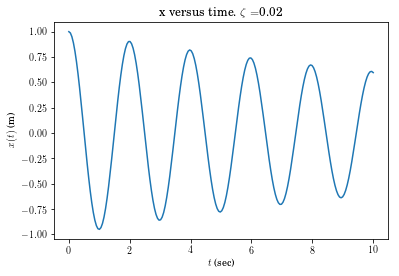

In [33]:
sdof_resp(1,0,1,.1,10,10)

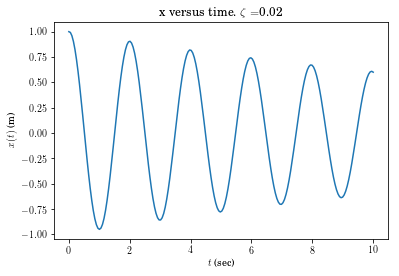

In [34]:
sdof_resp() # arguments aren't necessary to use the defaults. 

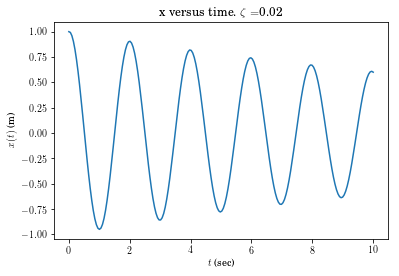

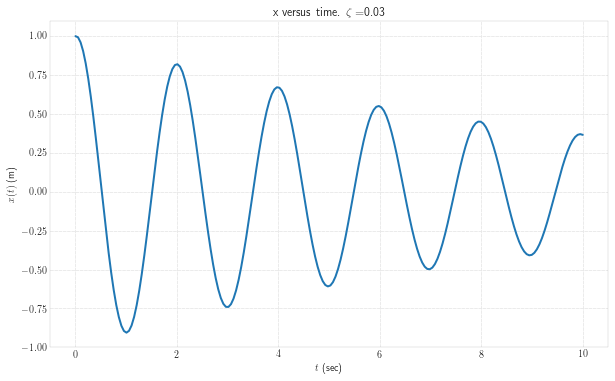

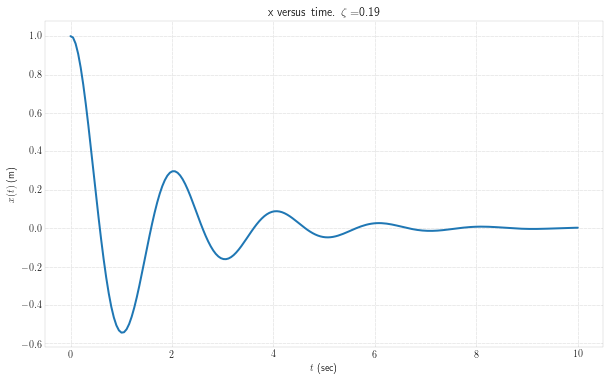

In [35]:
interact(sdof_resp, x0 = (0,2,0.1), v0 = (0,2,.1), m = (0,2,0.1), k = (0,100,1), c = (-1,5,.1));

In [51]:
globals()['a']

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [52]:
mydict = {'ham':'$2','bacon':'$3'}

In [53]:
mydict['ham']

'$2'

In [54]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/Users/jslater/anaconda/lib/python3.6/site-packages/pyqtgraph/canvas/CanvasTemplate_pyqt.py:10: RuntimeWarning:

Loaded module AnyQt._backport as a substitute for PyQt4



AnyQt               brain_six           jupyter_highlight_selected_word reprlib
Crypto              brain_ssl           jupyter_nbextensions_configurator requests
Cython              brain_subprocess    jupyter_sphinx      requests_toolbelt
IPython             brain_threading     jupyterlab          resource
OleFileIO_PL        brain_typing        jupyterlab_launcher rise
OpenSSL             bs4                 keyring             rlcompleter
Orange              builtins            keyword             rmagic
PIL                 bz2                 latex_envs          rope
PyQt5               cProfile            lazy_object_proxy   rpyc
__future__          calendar            lib2to3             ruamel_yaml
_ast                certifi             libfuturize         runpy
_asyncio            cffi                libpasteurize       s3fs
_bisect             cgen                linecache           s3transfer
_blake2             cgi                 llvmlite            sched
_bootlocale     

In [55]:
dir(scipy.optimize)

['LbfgsInvHessProduct',
 'OptimizeResult',
 'OptimizeWarning',
 'Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_cobyla',
 '_differentialevolution',
 '_group_columns',
 '_hungarian',
 '_lbfgsb',
 '_linprog',
 '_lsq',
 '_minimize',
 '_minpack',
 '_nnls',
 '_numdiff',
 '_root',
 '_slsqp',
 '_spectral',
 '_trustregion',
 '_trustregion_dogleg',
 '_trustregion_ncg',
 '_zeros',
 'absolute_import',
 'anderson',
 'approx_fprime',
 'basinhopping',
 'bisect',
 'bracket',
 'brent',
 'brenth',
 'brentq',
 'broyden1',
 'broyden2',
 'brute',
 'check_grad',
 'cobyla',
 'curve_fit',
 'diagbroyden',
 'differential_evolution',
 'division',
 'excitingmixing',
 'fixed_point',
 'fmin',
 'fmin_bfgs',
 'fmin_cg',
 'fmin_cobyla',
 'fmin_l_bfgs_b',
 'fmin_ncg',
 'fmin_powell',
 'fmin_slsqp',
 'fmin_tnc',
 'fminbound',
 'fsolve',
 'golden',
 'lbfgsb',
 'least_squares',
 'leastsq',
 'line_sear

In [56]:
help(scipy.optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti

In [57]:
import scipy.io as spio
help(spio.matlab)

Help on package scipy.io.matlab in scipy.io:

NAME
    scipy.io.matlab - Utilities for dealing with MATLAB(R) files

DESCRIPTION
    Notes
    -----
    MATLAB(R) is a registered trademark of The MathWorks, Inc., 3 Apple Hill
    Drive, Natick, MA 01760-2098, USA.

PACKAGE CONTENTS
    byteordercodes
    mio
    mio4
    mio5
    mio5_params
    mio5_utils
    mio_utils
    miobase
    setup
    streams

FUNCTIONS
    loadmat(file_name, mdict=None, appendmat=True, **kwargs)
        Load MATLAB file.
        
        Parameters
        ----------
        file_name : str
           Name of the mat file (do not need .mat extension if
           appendmat==True). Can also pass open file-like object.
        mdict : dict, optional
            Dictionary in which to insert matfile variables.
        appendmat : bool, optional
           True to append the .mat extension to the end of the given
           filename, if not already present.
        byte_order : str or None, optional
           

In [58]:
help(spio)

Help on package scipy.io in scipy:

NAME
    scipy.io

DESCRIPTION
    Input and output (:mod:`scipy.io`)
    
    .. currentmodule:: scipy.io
    
    SciPy has many modules, classes, and functions available to read data
    from and write data to a variety of file formats.
    
    .. seealso:: :ref:`numpy-reference.routines.io` (in Numpy)
    
    MATLAB® files
    
    .. autosummary::
       :toctree: generated/
    
       loadmat - Read a MATLAB style mat file (version 4 through 7.1)
       savemat - Write a MATLAB style mat file (version 4 through 7.1)
       whosmat - List contents of a MATLAB style mat file (version 4 through 7.1)
    
    IDL® files
    
    .. autosummary::
       :toctree: generated/
    
       readsav - Read an IDL 'save' file
    
    Matrix Market files
    
    .. autosummary::
       :toctree: generated/
    
       mminfo - Query matrix info from Matrix Market formatted file
       mmread - Read matrix from Matrix Market formatted file
       mmwrit

In [59]:
import pandas as pd

In [60]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel:

read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)
    Read an Excel table into a pandas DataFrame
    
    Parameters
    ----------
    io : string, path object (pathlib.Path or py._path.local.LocalPath),
        file-like object, pandas ExcelFile, or xlrd workbook.
        The string could be a URL. Valid URL schemes include http, ftp, s3,
        and file. For file URLs, a host is expected. For instance, a local
        file could be file://localhost/path/to/workbook.xlsx
    sheetname : string, int, mixed list of strings/ints, or None, default 0
    
        Strings are used for sheet names, Integers are used in zero-indexed
        sheet positions.
    
 

In [61]:
df = pd.read_excel('Financial_Sample.xlsx')

In [62]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014


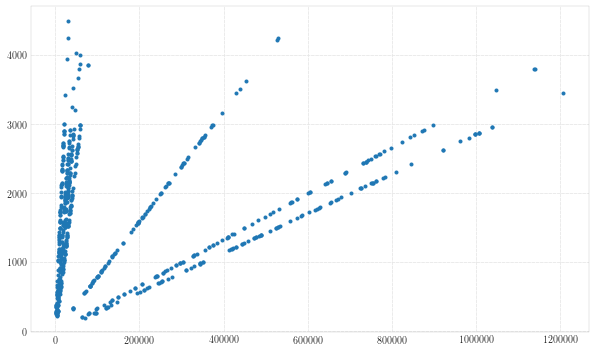

In [63]:
plt.plot(df['Gross Sales'],df['Units Sold'],'.')

In [64]:
df[['Gross Sales','Units Sold']].iloc[[0,2],[0,1]]

,Gross Sales,Units Sold
0,32370.0,1618.5
2,32670.0,2178.0


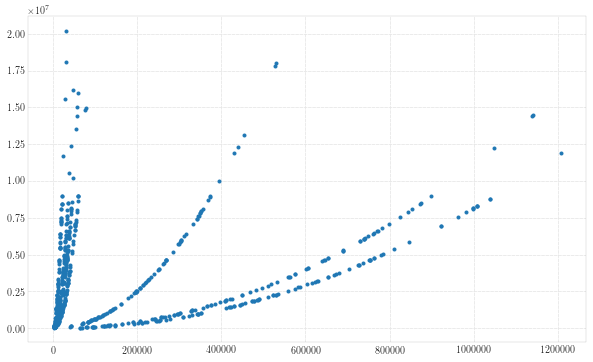

In [65]:
plt.plot(df['Gross Sales'],df['Units Sold']**2,'.')